In [1]:
import pandas as pd
import numpy as np
import sweetviz as sv

In [41]:
df = pd.read_csv('pokemon.csv')
df

,Name,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,Mega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...
1040,Glastrier,580,100,145,130,65,110,30
1041,Spectrier,580,100,65,60,145,80,130
1042,Calyrex,500,100,80,80,80,80,80
1043,Mega Calyrex,680,100,165,150,85,130,50


In [42]:
pokemonName = df['Name']
df = df.drop(['Name', 'Total'], axis=1)
df

,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65
...,...,...,...,...,...,...
1040,100,145,130,65,110,30
1041,100,65,60,145,80,130
1042,100,80,80,80,80,80
1043,100,165,150,85,130,50


In [45]:
# Creating a three dimensional dataset by averaging Attack, SP_attack; defence, sp_defence; HP , Speed;
lambdafunction = lambda x: pd.Series([(x['HP']+x['Speed']+x['Attack']+x['Defence'])/4, (x['Sp_attack']+x['Sp_defence'])/2])

df[['Normal', 'Special']] = df.apply(lambdafunction, axis=1)
df

,HP,Attack,Defence,Sp_attack,Sp_defence,Speed,Normal,Special
0,45,49,49,65,65,45,47.00,65.0
1,60,62,63,80,80,60,61.25,80.0
2,80,82,83,100,100,80,81.25,100.0
3,80,100,123,122,120,80,95.75,121.0
4,39,52,43,60,50,65,49.75,55.0
...,...,...,...,...,...,...,...,...
1040,100,145,130,65,110,30,101.25,87.5
1041,100,65,60,145,80,130,88.75,112.5
1042,100,80,80,80,80,80,85.00,80.0
1043,100,165,150,85,130,50,116.25,107.5


In [46]:
cleanDF = df[['Normal', 'Special']]
cleanDF

,Normal,Special
0,47.00,65.0
1,61.25,80.0
2,81.25,100.0
3,95.75,121.0
4,49.75,55.0
...,...,...
1040,101.25,87.5
1041,88.75,112.5
1042,85.00,80.0
1043,116.25,107.5


In [51]:
# Creating the Kmeans model.
from sklearn.cluster import KMeans
pokemonCluster = KMeans(n_clusters=3, random_state=0).fit(cleanDF)
pokemonCluster.labels_

array([0, 1, 2, ..., 1, 2, 2])

In [52]:
def colorPointer(x):
    colorMap = {
        0:'#FF0000', 1:'#00FF00', 2:'#0000FF', 3:'#000000'
    }
    return colorMap.get(x)

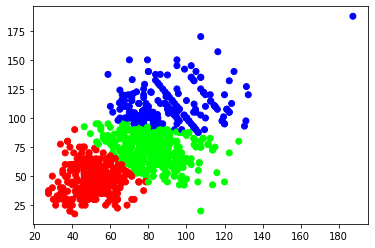

In [53]:
colors = np.array([colorPointer(x) for x in pokemonCluster.labels_])
import matplotlib.pyplot as plt
plt.scatter(df.Normal, df.Special, c=colors)
plt.show()

In [70]:
# Creating a dictionary for API
data = [
    {
        'name': 'Low Lyers',
        'series': []
    },
    {
        'name': 'Average Players',
        'series': []
    },
    {
        'name': 'Pro Players',
        'series': []
    }
]
for index, row in cleanDF.iterrows():
    data[pokemonCluster.labels_[index]]['series'].append({'name': pokemonName[index], 'x': row['Normal'], 'y': row['Special']})
data

[{'name': 'Low Lyers',
  'series': [{'name': 'Bulbasaur', 'x': 47.0, 'y': 65.0},
   {'name': 'Charmander', 'x': 49.75, 'y': 55.0},
   {'name': 'Squirtle', 'x': 50.0, 'y': 57.0},
   {'name': 'Caterpie', 'x': 38.75, 'y': 20.0},
   {'name': 'Metapod', 'x': 38.75, 'y': 25.0},
   {'name': 'Weedle', 'x': 38.75, 'y': 20.0},
   {'name': 'Kakuna', 'x': 38.75, 'y': 25.0},
   {'name': 'Pidgey', 'x': 45.25, 'y': 35.0},
   {'name': 'Pidgeotto', 'x': 62.25, 'y': 50.0},
   {'name': 'Rattata', 'x': 48.25, 'y': 30.0},
   {'name': 'Mega Rattata', 'x': 48.25, 'y': 30.0},
   {'name': 'Spearow', 'x': 50.0, 'y': 31.0},
   {'name': 'Ekans', 'x': 48.5, 'y': 47.0},
   {'name': 'Pikachu', 'x': 55.0, 'y': 50.0},
   {'name': 'Sandshrew', 'x': 62.5, 'y': 25.0},
   {'name': 'Mega Sandshrew', 'x': 63.75, 'y': 22.5},
   {'name': 'Nidoran♀', 'x': 48.75, 'y': 40.0},
   {'name': 'Nidorina', 'x': 63.75, 'y': 55.0},
   {'name': 'Nidoran♂', 'x': 48.25, 'y': 40.0},
   {'name': 'Nidorino', 'x': 63.75, 'y': 55.0},
   {'name':

In [76]:
# Time for pickling
import pickle
maxDetails = [int(df['HP'].max()), int(df['Speed'].max()), int(df['Attack'].max()), int(df['Defence'].max()), int(df['Sp_attack'].max()), int(df['Sp_defence'].max())]
minDetails = [int(df['HP'].min()), int(df['Speed'].min()), int(df['Attack'].min()), int(df['Defence'].min()), int(df['Sp_attack'].min()), int(df['Sp_defence'].min())]
pickle_data = {"clusterData":data, "model":pokemonCluster, 'maxDetails': maxDetails, 'minDetails': minDetails}
file_name = "pokemonCluster.pkl"

open_file = open(file_name, "wb")
pickle.dump(pickle_data, open_file)
open_file.close()

In [75]:
int(df['HP'].max())

255

In [80]:
pokemonCluster.predict([[120, 10], [19, 60]])

array([1, 0])